# Falling baseball in one dimension

## Equations of Motion

We anticipate the mathematical model to come and assume that we have a
model for the motion of a falling baseball without air resistance.
Our system (the baseball) is at an initial height $y_0$ (which we will
specify in the computation below) at the initial time $t_0=0$. In our computational example here we will plot the position in steps of $\Delta t$ up to a final time $t_f$. 
The mathematical formula for the position $y(t)$ as function of time $t$ is

$$
y(t) = y_0-\frac{1}{2}gt^2,
$$

where $g=9.80665$ representing the acceleration due to gravity. In this model we will ignore all other interactions besides a gravitational attraction to the Earth. The model ends at the ball reaching the ground, which occurs at:

$$
y(t) = 0= y_0-\frac{1}{2}gt^2,
$$

which gives us a final time $t_f=\sqrt{2y_0/g}$. 

As of now we simply assume that   we know the formula for the falling object. Afterwards, we will derive it.

We start with preparing folders for storing our calculations, figures and if needed, specific data files we use as input or output files.

In [2]:
%matplotlib inline

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

#in case we have an input file we wish to read in
#infile = open(data_path("MassEval2016.dat"),'r')

You could also define a function for making our plots. You
can obviously avoid this and simply set up various **matplotlib**
commands every time you need them. You may however find it convenient
to collect all such commands in one function and simply call this
function.

In [3]:
from pylab import plt, mpl
import seaborn as sns
sns.set_theme()

mpl.rcParams['font.family'] = 'serif'

def MakePlot(x,y, styles, labels, axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label = labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

Below is the code for the falling object. Here we used **pandas** (see below) to systemize the output of the position as function of time.


,t[s],y[m]
0,0.0,10.000000
1,0.1,9.950967
2,0.2,9.803869
3,0.3,9.558705
4,0.4,9.215476
5,0.5,8.774181
6,0.6,8.234821
7,0.7,7.597395
8,0.8,6.861904
9,0.9,6.028347


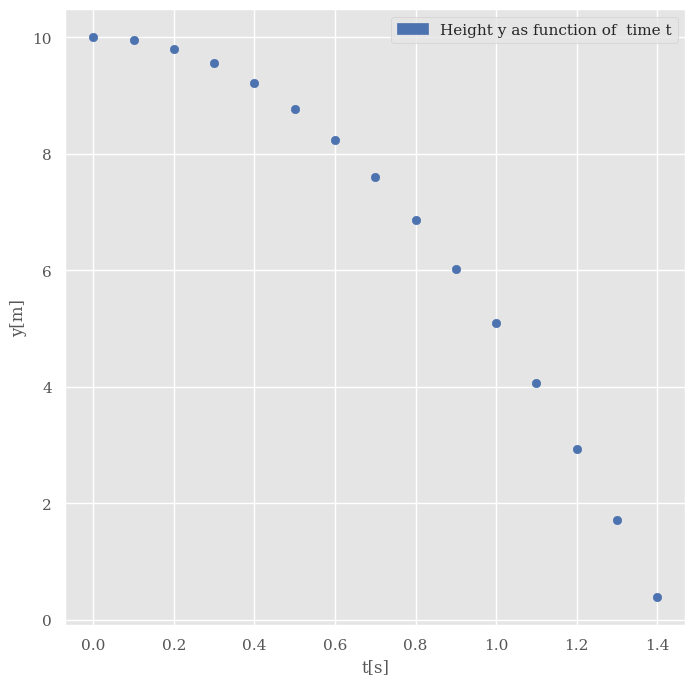

In [4]:
%matplotlib inline
import matplotlib.patches as mpatches
import pandas as pd
from IPython.display import display

g = 9.80655 #m/s^2
y_0 = 10.0 # initial position in meters
DeltaT = 0.1  # time step

# final time when y = 0, t = sqrt(2*10/g)
tfinal = np.sqrt(2.0*y_0/g)

#set up arrays 
t = np.arange(0,tfinal,DeltaT)

y =y_0 -g*.5*t**2 #equation of motion

# Then make a nice printout in table form using Pandas
data = {'t[s]': t,
        'y[m]': y
        }
RawData = pd.DataFrame(data)
display(RawData)
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.scatter(t, y, color = 'b')
blue_patch = mpatches.Patch(color = 'b', label = 'Height y as function of  time t')
plt.legend(handles=[blue_patch])
plt.xlabel("t[s]")
plt.ylabel("y[m]")
save_fig("FallingBaseball")
plt.show()

We define now the average velocity as

$$
\overline{v}(t) = \frac{y(t+\Delta t)-y(t)}{\Delta t}.
$$

In the code we have set the time step $\Delta t$ to a given value. We could define it in terms of the number of points $n$ as

$$
\Delta t = \frac{t_{\mathrm{final}-}t_{\mathrm{initial}}}{n+1}.
$$

Since we have discretized the variables, we introduce the counter $i$ and let $y(t)\rightarrow y(t_i)=y_i$ and $t\rightarrow t_i$
with $i=0,1,\dots, n$. This gives us the following shorthand notations that we will use for the rest of this course. We define

$$
y_{i\pm 1} = y(t_i\pm \Delta t),\hspace{0.12cm} i=0,1,2,\dots,n.
$$

### Compact equations

We can then rewrite in a more compact form the average velocity as

$$
\overline{v}_i = \frac{y_{i+1}-y_{i}}{\Delta t}.
$$

The velocity is defined as the change in position per unit time.
In the limit $\Delta t \rightarrow 0$ this defines the instantaneous velocity, which is nothing but the slope of the position at a time $t$.
We have thus

$$
v(t) = \frac{dy}{dt}=\lim_{\Delta t \rightarrow 0}\frac{y(t+\Delta t)-y(t)}{\Delta t}.
$$

Similarly, we can define the average acceleration as the change in velocity per unit time as

$$
\overline{a}_i = \frac{v_{i+1}-v_{i}}{\Delta t},
$$

resulting in the instantaneous acceleration

$$
a(t) = \frac{dv}{dt}=\lim_{\Delta t\rightarrow 0}\frac{v(t+\Delta t)-v(t)}{\Delta t}.
$$

**A note on notations**: When writing for example the velocity as $v(t)$ we are then referring to the continuous and instantaneous value. A subscript like
$v_i$ refers always to the discretized values.


We can rewrite the instantaneous acceleration as

$$
a(t) = \frac{dv}{dt}=\frac{d}{dt}\frac{dy}{dt}=\frac{d^2y}{dt^2}.
$$

This forms the starting point for our definition of forces later. It is a famous second-order differential equation. If the acceleration is constant we can now recover the formula for the falling ball we started with.
The acceleration can depend on the position and the velocity. To be more formal we should then write the above differential equation as
$$
F(y,v,t)=m\frac{d^2y}{dt^2}=ma(t,y(t),\frac{dy}{dt}),
$$


$$
\frac{d^2y}{dt^2}=a(t,y(t),\frac{dy}{dt}).
$$

With given initial conditions for $y(t_0)$ and $v(t_0)$ we can then
integrate the above equation and find the velocities and positions at
a given time $t$.

If we multiply with mass, we have one of the famous expressions for Newton's second law,

$$
F(y,v,t)=m\frac{d^2y}{dt^2}=ma(t,y(t),\frac{dy}{dt}),
$$

where $F$ is the force acting on an object with mass $m$. We see that it also has the right dimension, mass times length divided by time squared.
We will come back to this soon.


### Integrating our equations

Formally we can then, starting with the acceleration (suppose we have measured it, how could we do that?)
compute say the height of a building.  To see this we perform the following integrations from an initial time $t_0$  to a given time $t$

$$
\int_{t_0}^t dt a(t) = \int_{t_0}^t dt \frac{dv}{dt} = v(t)-v(t_0),
$$

or
$$
v(t)=v(t_0)+\int_{t_0}^t dt a(t).
$$

When we know the velocity as function of time, we can find the position as function of time starting from the defintion of velocity as the derivative with respect to time, that is we have

$$
\int_{t_0}^t dt v(t) = \int_{t_0}^t dt \frac{dy}{dt} = y(t)-y(t_0),
$$

or

$$
y(t)=y(t_0)+\int_{t_0}^t dt v(t).
$$

These equations define what is called the integration method for
finding the position and the velocity as functions of time. There is
no loss of generality if we extend these equations to more than one
spatial dimension.


Let us compute the velocity using the constant value for the acceleration given by $-g$. We have

$$
v(t)=v(t_0)+\int_{t_0}^t dt a(t)=v(t_0)+\int_{t_0}^t dt (-g).
$$

Using our initial time as $t_0=0$s and setting the initial velocity $v(t_0)=v_0=0$m/s we get when integrating

$$
v(t)=-gt.
$$

The more general case is

$$
v(t)=v_0-g(t-t_0).
$$

We can then integrate the velocity and obtain the final formula for the position as function of time through

$$
y(t)=y(t_0)+\int_{t_0}^t dt v(t)=y_0+\int_{t_0}^t dt v(t)=y_0+\int_{t_0}^t dt (-gt),
$$

With $y_0=10$m and $t_0=0$s, we obtain the equation we started with

$$
y(t)=10-\frac{1}{2}gt^2.
$$

### Computing the averages

After this mathematical background we are now ready to compute the mean velocity using our data.

In [5]:
# Now we can compute the mean velocity using our data
# We define first an array Vaverage
n = np.size(t)
Vaverage = np.zeros(n)
for i in range(1,n-1):
    Vaverage[i] = (y[i+1]-y[i])/DeltaT
# Now we can compute the mean accelearatio using our data
# We define first an array Aaverage
n = np.size(t)
Aaverage = np.zeros(n)
Aaverage[0] = -g
for i in range(1,n-1):
    Aaverage[i] = (Vaverage[i+1]-Vaverage[i])/DeltaT
data = {'t[s]': t,
        'y[m]': y,
        'v[m/s]': Vaverage,
        'a[m/s^2]': Aaverage
        }
NewData = pd.DataFrame(data)
display(NewData[0:n-2])

,t[s],y[m],v[m/s],a[m/s^2]
0,0.0,10.000000,0.000000,-9.80655
1,0.1,9.950967,-1.470982,-9.80655
2,0.2,9.803869,-2.451638,-9.80655
3,0.3,9.558705,-3.432292,-9.80655
4,0.4,9.215476,-4.412948,-9.80655
5,0.5,8.774181,-5.393602,-9.80655
6,0.6,8.234821,-6.374258,-9.80655
7,0.7,7.597395,-7.354913,-9.80655
8,0.8,6.861904,-8.335567,-9.80655
9,0.9,6.028347,-9.316222,-9.80655
